In [18]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [19]:
from pyspark.sql import SparkSession
if 'spark' in locals():
    spark.stop()

In [20]:
spark=SparkSession.builder.appName('Varun').getOrCreate()

In [4]:
dat=[1,2,3,4,5]

In [16]:
spark

In [17]:
#rdd creation
rdd=spark.sparkContext.parallelize(dat)

In [6]:
fd=rdd.filter(lambda x:x%2==0)

In [7]:
rdd.collect()

[1, 2, 3, 4, 5]

In [4]:
#dataframe creation
data = [
    (1, "Alice", 25),
    (2, "Bob", 30),
    (3, "Cathy", 28)
]

columns = ["ID", "Name", "Age"]

df = spark.createDataFrame(data, schema=columns)

df.show()


+---+-----+---+
| ID| Name|Age|
+---+-----+---+
|  1|Alice| 25|
|  2|  Bob| 30|
|  3|Cathy| 28|
+---+-----+---+



In [ ]:
spark.stop()

In [17]:
df_2=spark.read.csv("C:/Users/acer/Downloads/data.tsv",sep='\t', header=True, inferSchema=True)

In [18]:
df_2.show()

+--------+----------+-----+------+---------+-----+
|deviceid|customerid|price|alerts| location|state|
+--------+----------+-----+------+---------+-----+
|       1|        11|  100|    14|Bengaluru|   KA|
|       2|        22|  200|    25|   Mysuru|   KA|
|       3|        33|  300|     6|       AP| NULL|
|       4|        44|  ten|     7|  Chennai|   TN|
|       5|      NULL|  250|     8| Hubballi|   KA|
|       6|        66|  600|     9|    Bidar|   KA|
|       7|        77| NULL|     7|  Belgavi|   KA|
+--------+----------+-----+------+---------+-----+



In [19]:
df_2.printSchema()

root
 |-- deviceid: integer (nullable = true)
 |-- customerid: integer (nullable = true)
 |-- price: string (nullable = true)
 |-- alerts: integer (nullable = true)
 |-- location: string (nullable = true)
 |-- state: string (nullable = true)



In [20]:
#renaming columns
df_2 = df_2.withColumnRenamed('deviceid', 'Device Id').withColumnRenamed('customerid', 'Customer Id').withColumnRenamed('price', 'Price').withColumnRenamed('alerts', 'Alerts').withColumnRenamed('location', 'Location').withColumnRenamed('state', 'State')

In [21]:
df_2.show()

+---------+-----------+-----+------+---------+-----+
|Device Id|Customer Id|Price|Alerts| Location|State|
+---------+-----------+-----+------+---------+-----+
|        1|         11|  100|    14|Bengaluru|   KA|
|        2|         22|  200|    25|   Mysuru|   KA|
|        3|         33|  300|     6|       AP| NULL|
|        4|         44|  ten|     7|  Chennai|   TN|
|        5|       NULL|  250|     8| Hubballi|   KA|
|        6|         66|  600|     9|    Bidar|   KA|
|        7|         77| NULL|     7|  Belgavi|   KA|
+---------+-----------+-----+------+---------+-----+



In [22]:
#printing a message if the dataset contain nan
from pyspark.sql.functions import col, sum

null_counts = df_2.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_2.columns]).collect()[0]
null_counts

Row(Device Id=0, Customer Id=1, Price=1, Alerts=0, Location=0, State=1)

In [23]:
if any(null_counts):
    print("The Dataset contains NULL values")
else:
    print("The Dataset does not contain NULL values")

The dataset contains NULL values


In [24]:
#column with number of nan
df_2.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_2.columns]).show()

+---------+-----------+-----+------+--------+-----+
|Device Id|Customer Id|Price|Alerts|Location|State|
+---------+-----------+-----+------+--------+-----+
|        0|          1|    1|     0|       0|    1|
+---------+-----------+-----+------+--------+-----+



In [26]:
df_2=df_2.replace({'ten':'','200':''})
df_2.show()

+---------+-----------+-----+------+---------+-----+
|Device Id|Customer Id|Price|Alerts| Location|State|
+---------+-----------+-----+------+---------+-----+
|        1|         11|  100|    14|Bengaluru|   KA|
|        2|         22|     |    25|   Mysuru|   KA|
|        3|         33|  300|     6|       AP| NULL|
|        4|         44|     |     7|  Chennai|   TN|
|        5|       NULL|  250|     8| Hubballi|   KA|
|        6|         66|  600|     9|    Bidar|   KA|
|        7|         77| NULL|     7|  Belgavi|   KA|
+---------+-----------+-----+------+---------+-----+



In [27]:
df_2= df_2.withColumn("Price", col("Price").cast("float"))

In [32]:
#filling missing value by mean price
price_mean = df_2.select(mean("Price")).collect()[0][0]

In [34]:
price_mean

312.5

In [38]:
df_2 = df_2.fillna({"Price": price_mean})
df_2 = df_2.withColumn("Price", col("Price").cast("int"))

In [39]:
df_2.show()

+---------+-----------+-----+------+---------+-----+
|Device Id|Customer Id|Price|Alerts| Location|State|
+---------+-----------+-----+------+---------+-----+
|        1|         11|  100|    14|Bengaluru|   KA|
|        2|         22|  312|    25|   Mysuru|   KA|
|        3|         33|  300|     6|       AP| NULL|
|        4|         44|  312|     7|  Chennai|   TN|
|        5|       NULL|  250|     8| Hubballi|   KA|
|        6|         66|  600|     9|    Bidar|   KA|
|        7|         77|  312|     7|  Belgavi|   KA|
+---------+-----------+-----+------+---------+-----+



In [43]:
#drop row with nan in the subset
df_2=df_2.na.drop(how='any',subset=['Device Id','Customer Id'])

In [44]:
df_2.show()

+---------+-----------+-----+------+---------+-----+
|Device Id|Customer Id|Price|Alerts| Location|State|
+---------+-----------+-----+------+---------+-----+
|        1|         11|  100|    14|Bengaluru|   KA|
|        2|         22|  312|    25|   Mysuru|   KA|
|        3|         33|  300|     6|       AP| NULL|
|        4|         44|  312|     7|  Chennai|   TN|
|        6|         66|  600|     9|    Bidar|   KA|
|        7|         77|  312|     7|  Belgavi|   KA|
+---------+-----------+-----+------+---------+-----+



In [46]:
#total price of all  device
df_2.select(sum('Price')).show()

+----------+
|sum(Price)|
+----------+
|      1936|
+----------+



In [49]:
#displayig dataset ignore nan rows
df_2[df_2['State'].isNotNull()].show()

+---------+-----------+-----+------+---------+-----+
|Device Id|Customer Id|Price|Alerts| Location|State|
+---------+-----------+-----+------+---------+-----+
|        1|         11|  100|    14|Bengaluru|   KA|
|        2|         22|  312|    25|   Mysuru|   KA|
|        4|         44|  312|     7|  Chennai|   TN|
|        6|         66|  600|     9|    Bidar|   KA|
|        7|         77|  312|     7|  Belgavi|   KA|
+---------+-----------+-----+------+---------+-----+



In [51]:
#total number of alerts per state 
df_2.groupby('State').agg(sum('Alerts')).show()

+-----+-----------+
|State|sum(Alerts)|
+-----+-----------+
| NULL|          6|
|   TN|          7|
|   KA|         55|
+-----+-----------+



In [52]:
x=df_2.select(mean('Alerts')).collect()[0][0]

In [55]:
#printing alerts greather than their mean
x
df_2[df_2['Alerts']>x].show()

+---------+-----------+-----+------+---------+-----+
|Device Id|Customer Id|Price|Alerts| Location|State|
+---------+-----------+-----+------+---------+-----+
|        1|         11|  100|    14|Bengaluru|   KA|
|        2|         22|  312|    25|   Mysuru|   KA|
+---------+-----------+-----+------+---------+-----+



#Assessment-1 MOvies Dataset

In [36]:
from pyspark.sql.functions import current_timestamp
import random
import datetime

data = []
num_records = 100 

for _ in range(num_records):
    movie_id = random.randint(1, 50)  
    user_id = random.randint(1, 100)  
    rating = round(random.uniform(1, 5), 1) 
    timestamp = datetime.datetime.now() - datetime.timedelta(days=random.randint(0, 30))  
    
    data.append((movie_id, user_id, rating, timestamp))


columns = ['MovieID', 'UserID', 'Rating', 'Timestamp']
df = spark.createDataFrame(data, columns)

df.show(5)

+-------+------+------+--------------------+
|MovieID|UserID|Rating|           Timestamp|
+-------+------+------+--------------------+
|     21|    20|   1.2|2024-12-08 20:27:...|
|     42|    28|   3.8|2024-12-09 20:27:...|
|      6|    19|   4.6|2024-12-11 20:27:...|
|     11|    81|   2.8|2024-12-16 20:27:...|
|     17|    60|   3.6|2024-12-02 20:27:...|
+-------+------+------+--------------------+
only showing top 5 rows



In [5]:
df.printSchema()

root
 |-- MovieID: long (nullable = true)
 |-- UserID: long (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Timestamp: timestamp (nullable = true)



In [37]:
#converting date to dd-mm-yyyy format
from pyspark.sql.functions import *
df2 = df.withColumn("New_Timestamp", date_format("Timestamp", "dd-MM-yyyy HH:mm:ss"))

In [38]:
df2.show()

+-------+------+------+--------------------+-------------------+
|MovieID|UserID|Rating|           Timestamp|      New_Timestamp|
+-------+------+------+--------------------+-------------------+
|     21|    20|   1.2|2024-12-08 20:27:...|08-12-2024 20:27:48|
|     42|    28|   3.8|2024-12-09 20:27:...|09-12-2024 20:27:48|
|      6|    19|   4.6|2024-12-11 20:27:...|11-12-2024 20:27:48|
|     11|    81|   2.8|2024-12-16 20:27:...|16-12-2024 20:27:48|
|     17|    60|   3.6|2024-12-02 20:27:...|02-12-2024 20:27:48|
|     15|    92|   2.2|2024-11-20 20:27:...|20-11-2024 20:27:48|
|     19|    46|   5.0|2024-11-26 20:27:...|26-11-2024 20:27:48|
|      9|    91|   1.7|2024-11-30 20:27:...|30-11-2024 20:27:48|
|     34|    27|   1.1|2024-11-19 20:27:...|19-11-2024 20:27:48|
|     45|    56|   2.4|2024-12-13 20:27:...|13-12-2024 20:27:48|
|     12|    63|   2.7|2024-12-16 20:27:...|16-12-2024 20:27:48|
|     25|    60|   3.8|2024-12-18 20:27:...|18-12-2024 20:27:48|
|     18|    67|   2.2|20

In [39]:
#avg rating per movie 
df2.groupby('MovieID').agg(avg('Rating')).show()

+-------+------------------+
|MovieID|       avg(Rating)|
+-------+------------------+
|     19|               5.0|
|     34|1.9833333333333334|
|     32|2.9499999999999997|
|     25| 3.466666666666667|
|      6| 3.483333333333333|
|      9|               2.1|
|     17|              3.45|
|     44|              2.15|
|     12|               3.1|
|     11|             4.025|
|     35|              1.75|
|      4|2.3249999999999997|
|     18|               2.2|
|     21| 3.466666666666667|
|     15| 2.566666666666667|
|     42| 3.466666666666667|
|     30|               2.1|
|     40|               4.5|
|     16|3.9000000000000004|
|     45| 3.133333333333333|
+-------+------------------+
only showing top 20 rows



In [42]:
#user who rated than 2 movies
rating_count = df2.groupBy('UserID').agg(count('MovieID').alias('RatingCount'))

users_2ratings = rating_count.filter(rating_count['RatingCount'] > 2)

users_2ratings.show()

+------+-----------+
|UserID|RatingCount|
+------+-----------+
|    94|          3|
|    28|          3|
|    37|          3|
|    74|          3|
|    20|          3|
|    60|          3|
|    91|          3|
|     5|          3|
|    73|          3|
+------+-----------+



In [12]:
df2.show()

+-------+------+------+--------------------+-------------------+
|MovieID|UserID|Rating|           Timestamp|      New_Timestamp|
+-------+------+------+--------------------+-------------------+
|     37|    97|   1.2|2024-11-24 12:31:...|24-11-2024 12:31:41|
|     29|    72|   3.2|2024-12-06 12:31:...|06-12-2024 12:31:41|
|      7|    48|   1.1|2024-12-12 12:31:...|12-12-2024 12:31:41|
|     23|    21|   3.7|2024-12-01 12:31:...|01-12-2024 12:31:41|
|      9|    35|   3.0|2024-12-05 12:31:...|05-12-2024 12:31:41|
|     50|    22|   3.0|2024-12-02 12:31:...|02-12-2024 12:31:41|
|     45|    28|   1.5|2024-12-16 12:31:...|16-12-2024 12:31:41|
|     50|    98|   4.5|2024-11-23 12:31:...|23-11-2024 12:31:41|
|     50|    64|   1.7|2024-11-19 12:31:...|19-11-2024 12:31:41|
|     32|    56|   4.3|2024-12-06 12:31:...|06-12-2024 12:31:41|
|     19|    84|   1.5|2024-12-14 12:31:...|14-12-2024 12:31:41|
|     27|    79|   2.9|2024-12-11 12:31:...|11-12-2024 12:31:41|
|      7|    89|   2.5|20

In [13]:
#top 5 moies with with highest rating
avg_ratings = df2.groupBy('MovieID').agg(avg('Rating').alias('AverageRating'))

avg_ratings.orderBy('AverageRating', ascending=False).limit(5).show()


+-------+-----------------+
|MovieID|    AverageRating|
+-------+-----------------+
|     40|              4.8|
|     47|              4.6|
|     32|             4.55|
|     46|              4.4|
|     36|4.366666666666667|
+-------+-----------------+



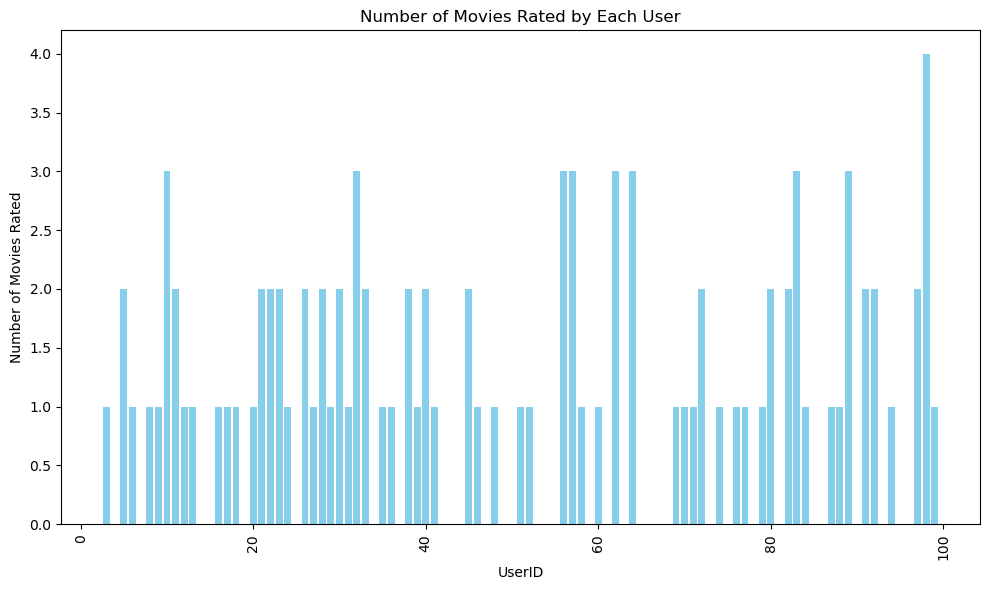

In [14]:
#ploting the number of movies rated by each user
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import count


rating_count = df2.groupBy('UserID').agg(count('MovieID').alias('RatingCount'))

df3 = rating_count.toPandas()

plt.figure(figsize=(10,6))
plt.bar(df3['UserID'], df3['RatingCount'], color='skyblue')
plt.xlabel('UserID')
plt.ylabel('Number of Movies Rated')
plt.title('Number of Movies Rated by Each User')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:
#Analysing trip data
from pyspark.sql import SparkSession
import random
import datetime

data = []

for _ in range(100):
    trip_id = random.randint(1, 50)
    start_time = datetime.datetime.now() - datetime.timedelta(hours=random.randint(1, 24))
    end_time = start_time + datetime.timedelta(minutes=random.randint(5, 120))
    distance = round(random.uniform(1, 5), 2) 
    fare = round(distance * random.uniform(5, 15), 2)
    
    data.append((trip_id, start_time, end_time, distance, fare))

In [22]:
#Load the dataset into a PySpark DataFrame.
columns = ['TripID', 'StartTime', 'EndTime', 'Distance', 'Fare']
df_trip = spark.createDataFrame(data, schema=columns)
df_trip.show(5)

+------+--------------------+--------------------+--------+-----+
|TripID|           StartTime|             EndTime|Distance| Fare|
+------+--------------------+--------------------+--------+-----+
|     2|2024-12-19 11:11:...|2024-12-19 13:08:...|    3.92| 50.0|
|    29|2024-12-19 19:11:...|2024-12-19 20:06:...|    3.73|32.28|
|    47|2024-12-19 04:11:...|2024-12-19 04:22:...|    1.93|28.88|
|     1|2024-12-18 22:11:...|2024-12-18 23:03:...|    2.33|31.29|
|    23|2024-12-19 18:11:...|2024-12-19 19:16:...|    1.45|10.36|
+------+--------------------+--------------------+--------+-----+
only showing top 5 rows



In [23]:
#trip duration for each trip.
from pyspark.sql.functions import unix_timestamp,col
#df_trip=df_trip.withColumn('Duration',df_trip['EndTime']-df_trip['StartTime'])
df_trip = df_trip.withColumn("Duration", (unix_timestamp(col("EndTime")) - unix_timestamp(col("StartTime")))/60)

In [24]:
df_trip.show()

+------+--------------------+--------------------+--------+-----+--------+
|TripID|           StartTime|             EndTime|Distance| Fare|Duration|
+------+--------------------+--------------------+--------+-----+--------+
|     2|2024-12-19 11:11:...|2024-12-19 13:08:...|    3.92| 50.0|   117.0|
|    29|2024-12-19 19:11:...|2024-12-19 20:06:...|    3.73|32.28|    55.0|
|    47|2024-12-19 04:11:...|2024-12-19 04:22:...|    1.93|28.88|    11.0|
|     1|2024-12-18 22:11:...|2024-12-18 23:03:...|    2.33|31.29|    52.0|
|    23|2024-12-19 18:11:...|2024-12-19 19:16:...|    1.45|10.36|    65.0|
|    37|2024-12-18 21:11:...|2024-12-18 21:57:...|    1.65|13.42|    46.0|
|    13|2024-12-19 00:11:...|2024-12-19 01:09:...|    3.61| 47.2|    58.0|
|     4|2024-12-19 11:11:...|2024-12-19 11:46:...|    2.74|40.34|    35.0|
|    39|2024-12-18 20:11:...|2024-12-18 20:54:...|    3.67|18.93|    43.0|
|    43|2024-12-19 18:11:...|2024-12-19 19:33:...|    1.06|14.48|    82.0|
|    49|2024-12-19 03:11:

In [25]:
#the average fare per mile.
df_trip.withColumn("FarePerMile", col("Fare") / col("Distance")).agg({'FarePerMile':'avg'}).collect()[0][0]

10.176491623345512

In [26]:
df_trip = df_trip.withColumn("FarePerMile", col("Fare") / col("Distance"))

average_fare_per_mile = df_trip.agg({"FarePerMile": "avg"}).collect()[0][0]

print(f"Average fare per mile: {average_fare_per_mile}")

Average fare per mile: 10.176491623345512


In [27]:
#the top 3 longest trips (based on distance)
df_trip.orderBy('Duration', ascending=False).limit(3).show()

+------+--------------------+--------------------+--------+-----+--------+-----------------+
|TripID|           StartTime|             EndTime|Distance| Fare|Duration|      FarePerMile|
+------+--------------------+--------------------+--------+-----+--------+-----------------+
|    11|2024-12-19 01:11:...|2024-12-19 03:11:...|    4.85|25.77|   120.0|5.313402061855671|
|     1|2024-12-18 21:11:...|2024-12-18 23:11:...|    4.23| 31.3|   120.0|7.399527186761229|
|    21|2024-12-19 04:11:...|2024-12-19 06:11:...|    1.03| 8.07|   120.0|7.834951456310679|
+------+--------------------+--------------------+--------+-----+--------+-----------------+



In [35]:
#Grouping trips by hours and total number of trips per hour.
from pyspark.sql.functions import hour,count

hr=df_trip.withColumn('Hour',hour("StartTime"))
hr_trip = hr.groupBy("Hour").agg(count("*").alias("TotalTrips"))

hr_trip.orderBy("Hour").show()

+----+----------+
|Hour|TotalTrips|
+----+----------+
|   0|         3|
|   1|         5|
|   2|         1|
|   3|         5|
|   4|         6|
|   5|         4|
|   6|         2|
|   7|         1|
|   8|         1|
|   9|         6|
|  10|         3|
|  11|         7|
|  12|         4|
|  13|         4|
|  14|         5|
|  15|         4|
|  16|         1|
|  17|         4|
|  18|         6|
|  19|         5|
+----+----------+
only showing top 20 rows

